In [1]:
output_dir = "output/"
# run.py
from mesa.batchrunner import BatchRunner

from ecosystem.model import EcoModel

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

# variable_params = {"b": range(0, 1, 2)}

# batch_run = BatchRunner(EcoModel,
#                         fixed_parameters=fixed_params,
#                         variable_parameters=None,  
#                         iterations=5,
#                         max_steps=100)
# batch_run.run_model()

In [2]:
from ecosystem.model import EcoModel
from mesa.datacollection import DataCollector


# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

model = EcoModel(100, 100, 0.4, 0.1)

for i in range(15):
    model.step()

Vegetated: 4959
Empty: 3591
Degraded: 1829
Vegetated: 4580
Empty: 4036
Degraded: 1610
Vegetated: 4354
Empty: 4274
Degraded: 1573
Vegetated: 4153
Empty: 4418
Degraded: 1618
Vegetated: 3964
Empty: 4508
Degraded: 1686
Vegetated: 3806
Empty: 4596
Degraded: 1735
Vegetated: 3669
Empty: 4623
Degraded: 1850
Vegetated: 3527
Empty: 4626
Degraded: 1936
Vegetated: 3438
Empty: 4593
Degraded: 2065
Vegetated: 3342
Empty: 4704
Degraded: 2114
Vegetated: 3182
Empty: 4666
Degraded: 2249
Vegetated: 3085
Empty: 4622
Degraded: 2370
Vegetated: 3008
Empty: 4580
Degraded: 2502
Vegetated: 2918
Empty: 4527
Degraded: 2608
Vegetated: 2865
Empty: 4486
Degraded: 2704


In [3]:
stats = model.datacollector.get_model_vars_dataframe()
stats

,Degraded,Empty,Vegetated,qplusminus,qplusplus
0,1829,3591,4580,0.481690,0.465502
1,1610,4036,4354,0.449083,0.457510
2,1573,4274,4153,0.424895,0.443896
3,1618,4418,3964,0.396107,0.439960
4,1686,4508,3806,0.380157,0.430767
5,1735,4596,3669,0.365807,0.421641
6,1850,4623,3527,0.348096,0.421179
7,1936,4626,3438,0.335333,0.422193
8,2065,4593,3342,0.328217,0.413226
9,2114,4704,3182,0.314094,0.402420


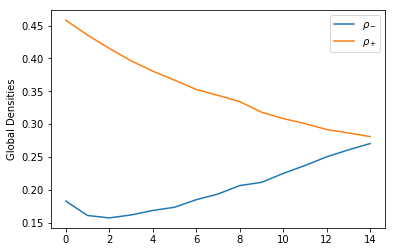

In [4]:
# Figure 3a 
# Plot the global densities at each time step

from matplotlib import pyplot as plt
plt.plot(stats.Degraded/(stats.Degraded+stats.Vegetated+stats.Empty), label = r'$\rho_-$')
plt.plot(stats.Vegetated/(stats.Degraded+stats.Vegetated+stats.Empty), label = r'$\rho_+$')
plt.legend()
plt.savefig(output_dir+"Global_densities.png", format = 'png' )
plt.ylabel('Global Densities')
plt.show()

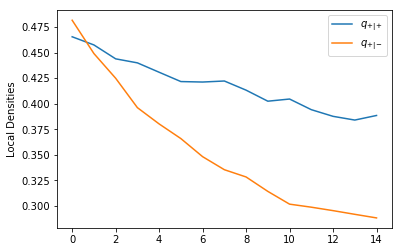

In [8]:
# Plot local densities
# q+|+ number of vegetated neighbours of vegetates sites
# q-|+ number of vegetated neighbours of degraded sites

from matplotlib import pyplot as plt
plt.plot(stats.qplusplus, label = r'$q_{+|+}$')
plt.plot(stats.qplusminus, label = r'$q_{+|-}$')
plt.legend()
plt.savefig(output_dir+"Local_densities.png", format = 'png' )
plt.ylabel('Local Densities')
plt.show()